In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [4]:
import requests
def download(url, filename):
    response=requests.get(url)
    with open(filename, "wb") as file:
        file.write(response.content)
    print(f"Downloaded {filename}") 

In [6]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [8]:
download(filepath, "laptops.csv")
file_name="laptops.csv"

Downloaded laptops.csv


In [10]:
df = pd.read_csv(file_name, header=0)

In [12]:
#filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
#df = pd.read_csv(filepath, header=None)

In [14]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


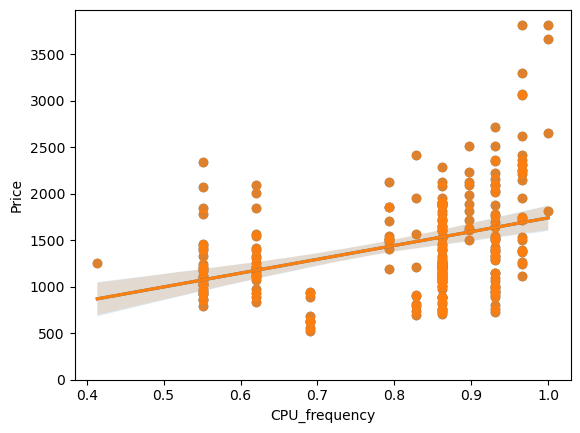

In [30]:
# CPU_frequency plot
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)
plt.show()

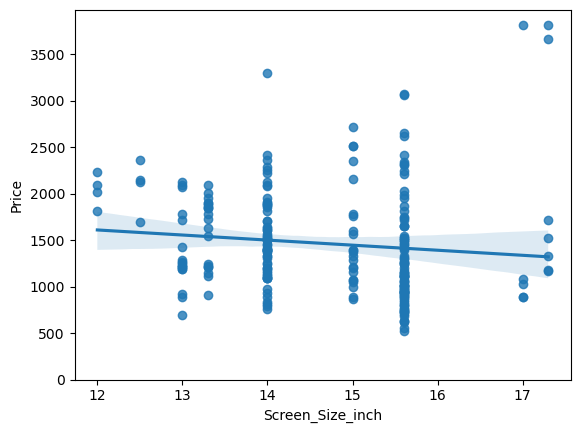

In [32]:
# Screen_Size_inch plot
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)
plt.show()

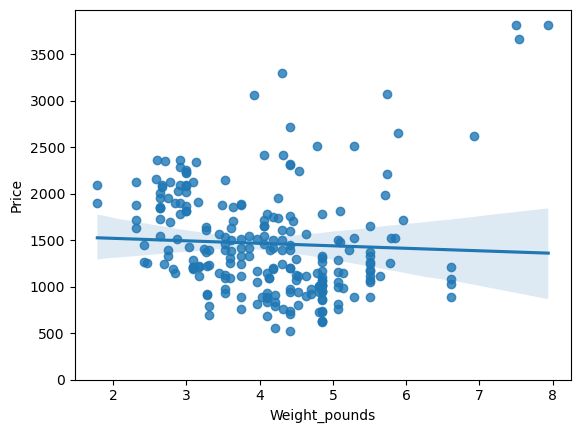

In [34]:
# Weight_pounds plot
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)
plt.show()

In [36]:
# Correlation values of the three attributes with Price
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


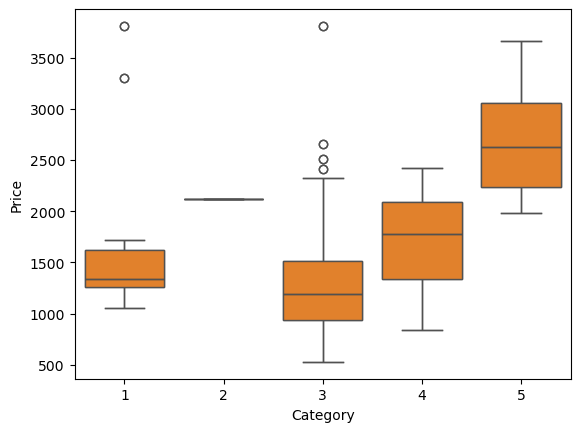

In [42]:
# Category Box plot
sns.boxplot(x="Category", y="Price", data=df)
plt.show()

In [44]:
# GPU Box plot
sns.boxplot(x="GPU", y="Price", data=df)

<Axes: xlabel='GPU', ylabel='Price'>

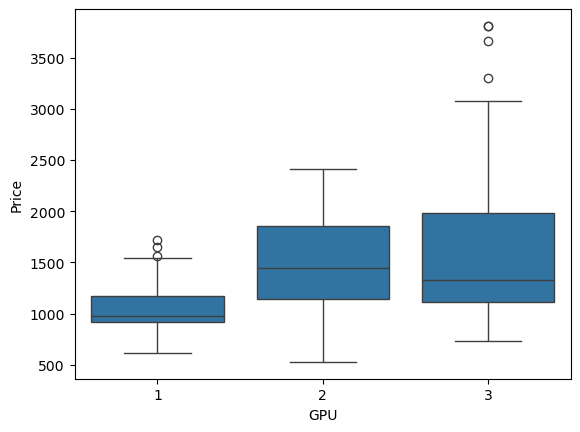

In [46]:
plt.show()

In [48]:
# OS Box plot
sns.boxplot(x="OS", y="Price", data=df)

<Axes: xlabel='OS', ylabel='Price'>

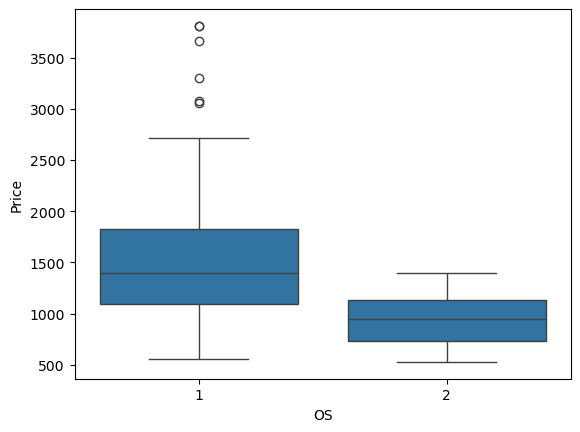

In [50]:
plt.show()

In [52]:
# CPU_core Box plot
sns.boxplot(x="CPU_core", y="Price", data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

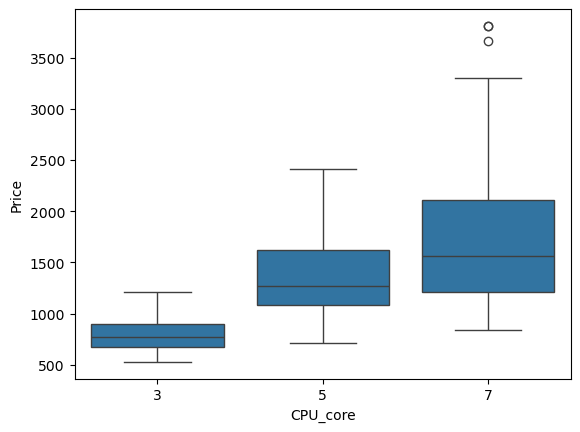

In [54]:
plt.show()

In [56]:
# RAM_GB Box plot
sns.boxplot(x="RAM_GB", y="Price", data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

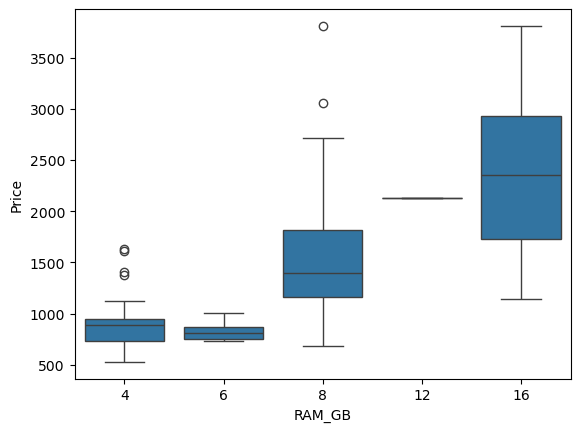

In [58]:
plt.show()

In [60]:
# Storage_GB_SSD Box plot
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

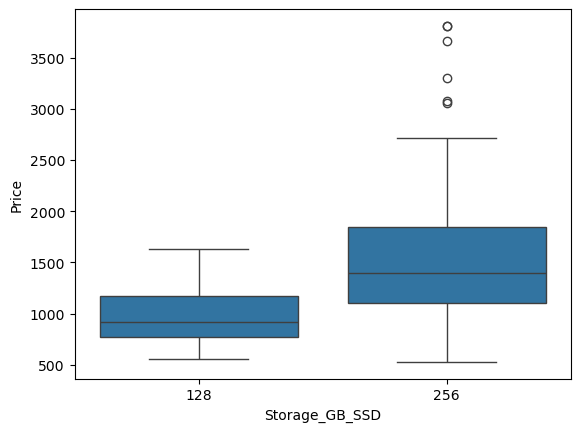

In [62]:
plt.show()

In [64]:
print(df.describe())
print(df.describe(include=['object']))

       Unnamed: 0.1  Unnamed: 0    Category         GPU          OS  \
count    238.000000  238.000000  238.000000  238.000000  238.000000   
mean     118.500000  118.500000    3.205882    2.151261    1.058824   
std       68.848868   68.848868    0.776533    0.638282    0.235790   
min        0.000000    0.000000    1.000000    1.000000    1.000000   
25%       59.250000   59.250000    3.000000    2.000000    1.000000   
50%      118.500000  118.500000    3.000000    2.000000    1.000000   
75%      177.750000  177.750000    4.000000    3.000000    1.000000   
max      237.000000  237.000000    5.000000    3.000000    2.000000   

         CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count  238.000000        238.000000     238.000000  238.000000   
mean     5.630252         14.688655       0.813822    7.882353   
std      1.241787          1.166045       0.141860    2.482603   
min      3.000000         12.000000       0.413793    4.000000   
25%      5.000000         14.0

In [66]:
# Create the group
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [68]:
# Create the Pivot table
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


In [70]:
# Create the Plot
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

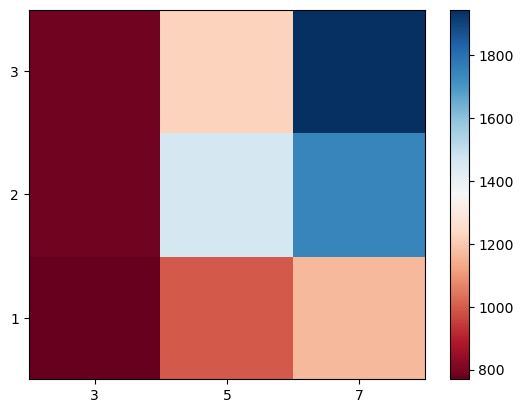

In [72]:
plt.show()

In [74]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857841  with a P-value of P = 3.6815606288429613e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588604  with a P-value of P = 5.5024633507134225e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.2434207552181029  with a P-value of P = 0.00014898923191724174
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118269  with a P-value of P = 0.08853397846830766
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.05031225837751549  with a P-value of P = 0.43976938534338944
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.45939777733551157  with a P-value of P = 7.912950127009034e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.2217298011482738  with a P-value of P = 0.0005696642559246749
GPU
The Pearson Correlation Coefficient for  GPU  is 0.2882981988881428  